Create a Naïve Bayes classification model using Python on on social network ads.csv   dataset. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
# Load the dataset
ads_df = pd.read_csv('Social_Network_Ads.csv')
ads_df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [46]:
ads_df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [47]:
# Split the dataset into features (X) and target variable (y)
X = ads_df[['Age', 'EstimatedSalary']]
y = ads_df['Purchased']

In [48]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Initialize and train the Naïve Bayes classifier
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [50]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

In [51]:
# Compute Confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[50  2]
 [ 4 24]]


In [52]:
# Compute evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
error_rate = 1 - accuracy

In [53]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Error Rate:", error_rate)

Accuracy: 0.925
Precision: 0.9230769230769231
Recall: 0.8571428571428571
Error Rate: 0.07499999999999996


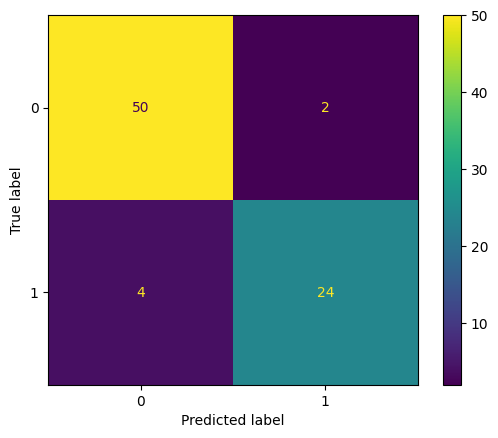

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

In [55]:
def get_confusion_matrix_values(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    return (conf_matrix[0][0], conf_matrix[0][1],conf_matrix[1][0], conf_matrix[1][1])

TN, FP, FN, TP = get_confusion_matrix_values(y_test, y_pred)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)
print("TP:", TP)

TN: 50
FP: 2
FN: 4
TP: 24


In [56]:
print("The Accuracy is: ", (TP+TN)/(TP+FP+TN+FN))
print("The Precision is: ", (TP/(TP+FP)))
print("The Recall is: ", (TP/(TP+FN)))

The Accuracy is:  0.925
The Precision is:  0.9230769230769231
The Recall is:  0.8571428571428571


True Positives (TP): These are the cases where the model predicted the positive class correctly, and the actual class was also positive.
False Positives (FP): These are the cases where the model predicted the positive class incorrectly (predicted as positive), but the actual class was negative.
True Negatives (TN): These are the cases where the model predicted the negative class correctly, and the actual class was also negative.
False Negatives (FN): These are the cases where the model predicted the negative class incorrectly (predicted as negative), but the actual class was positive.